In [1]:
# Install required libraries for analysis (run once)
!pip install matplotlib pandas pillow numpy seaborn tqdm


In [2]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
import random

%matplotlib inline


In [3]:
# We assume the notebook is located in the text2img project root
repo_root = Path.cwd()
report_path = repo_root / "sample_outputs" / "milestone3_report.json"

print("Using report path:", report_path)

with open(report_path, "r") as f:
    report = json.load(f)

report


Using report path: /home/padmanabhan.h/projects/text2img/sample_outputs/milestone3_report.json


{'config': {'n_samples': 100, 'val_csv': '../data/manifests/coco_train1k.csv'},
 'modelA': {'name': 'Milestone 1 baseline',
  'gen_dir': '../sample_outputs/milestone1_output',
  'FID': 215.6385,
  'IS_mean': 6.7866,
  'IS_std': 0.832},
 'modelB': {'name': 'Milestone 2 improved',
  'gen_dir': '../sample_outputs/milestone2_output',
  'FID': 215.3984,
  'IS_mean': 6.695,
  'IS_std': 0.8917},
 'timestamp': '2025-11-24 00:27:50.573637'}

In [4]:
data = [
    {
        "Model": report.get("modelA", {}).get("name", "Milestone 1 baseline"),
        "FID": report["modelA"]["FID"],
        "IS_mean": report["modelA"]["IS_mean"],
        "IS_std": report["modelA"]["IS_std"],
    },
    {
        "Model": report.get("modelB", {}).get("name", "Milestone 2 improved"),
        "FID": report["modelB"]["FID"],
        "IS_mean": report["modelB"]["IS_mean"],
        "IS_std": report["modelB"]["IS_std"],
    },
]

df = pd.DataFrame(data)
df


,Model,FID,IS_mean,IS_std
0,Milestone 1 baseline,215.6385,6.7866,0.8320
1,Milestone 2 improved,215.3984,6.6950,0.8917


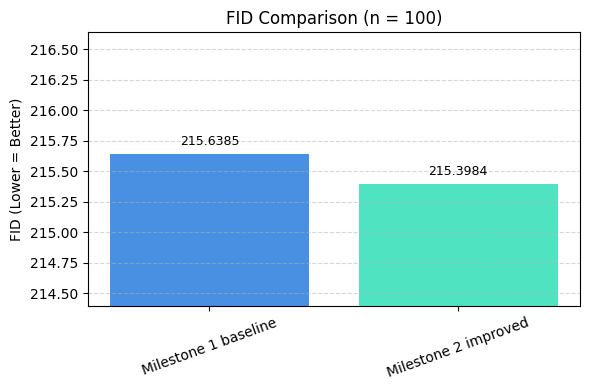

In [5]:
labels = df["Model"]
fid_scores = df["FID"].values

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, fid_scores, color=["#4a90e2", "#50e3c2"])
plt.title("FID Comparison (n = 100)")
plt.ylabel("FID (Lower = Better)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=20)

# Tighten y-axis so differences are visible
margin = 1.0
ymin = fid_scores.min() - margin
ymax = fid_scores.max() + margin
plt.ylim(ymin, ymax)

# Add numeric labels on bars
for bar, val in zip(bars, fid_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val + 0.05,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()


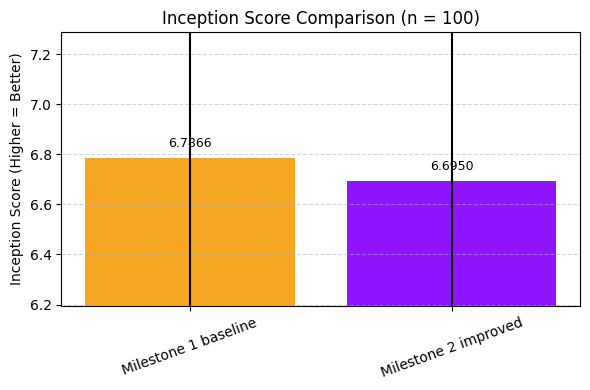

In [6]:
labels = df["Model"]
is_means = df["IS_mean"].values
is_stds = df["IS_std"].values

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, is_means, yerr=is_stds, capsize=8, color=["#f5a623", "#9013fe"])
plt.title("Inception Score Comparison (n = 100)")
plt.ylabel("Inception Score (Higher = Better)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=20)

# Tighten y-axis to highlight small differences
margin = 0.5
ymin = is_means.min() - margin
ymax = is_means.max() + margin
plt.ylim(ymin, ymax)

# Add numeric labels
for bar, val in zip(bars, is_means):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val + 0.03,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()


In [7]:
def show_samples(img_dir, title, max_images=5):
    img_paths = sorted(glob.glob(str(img_dir / "*.png")))
    if not img_paths:
        print(f"No PNG images found in {img_dir}")
        return
    
    img_paths = img_paths[:max_images]
    n = len(img_paths)
    plt.figure(figsize=(3*n, 3))
    
    for i, path in enumerate(img_paths):
        img = Image.open(path).convert("RGB")
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{i}")
        
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


Model A dir: /home/padmanabhan.h/projects/text2img/sample_outputs/milestone1_output
Model B dir: /home/padmanabhan.h/projects/text2img/sample_outputs/milestone2_output


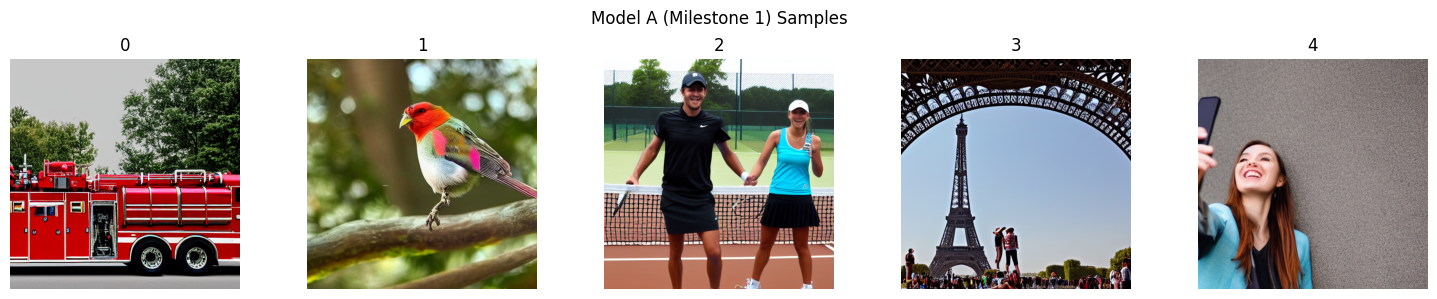

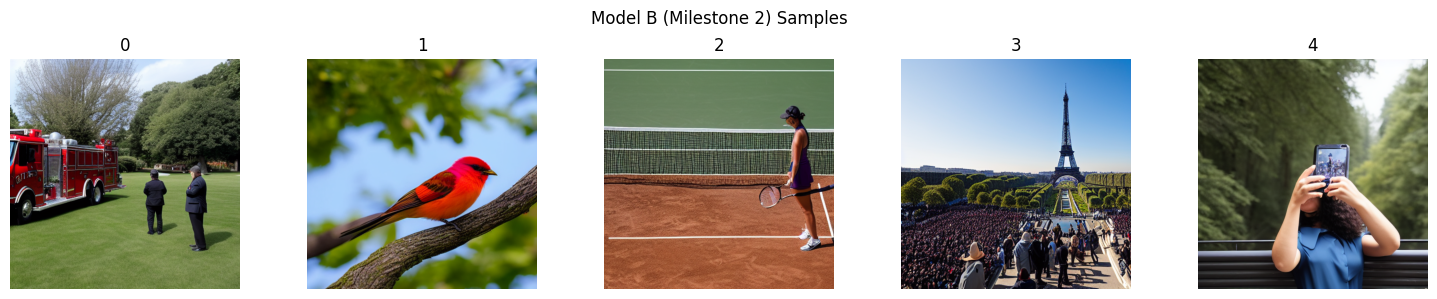

In [8]:
model_a_dir = repo_root / "sample_outputs" / "milestone1_output"
model_b_dir = repo_root / "sample_outputs" / "milestone2_output"

print("Model A dir:", model_a_dir)
print("Model B dir:", model_b_dir)

show_samples(model_a_dir, "Model A (Milestone 1) Samples")
show_samples(model_b_dir, "Model B (Milestone 2) Samples")
